In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from fbprophet import Prophet
import logging



In [4]:
DataFrame = pd.read_csv("/home/sonam/Downloads/covid_19_data.csv")
DataFrame

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3079,3080,03/02/2020,"Umatilla, OR",US,2020-03-02T20:23:16,1.0,0.0,0.0
3080,3081,03/02/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3081,3082,03/02/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3082,3083,03/02/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [36]:
DataFrame = pd.read_csv("sars.csv")
DataFrame

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


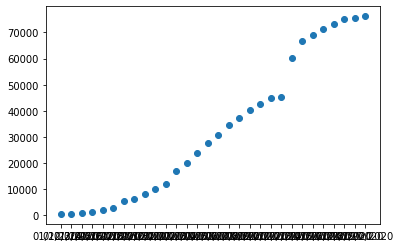

In [17]:
datewise=DataFrame.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})


train_df=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])
train_df = train_df[:30]

ds = train_df['ds']
y = train_df['y']
plt.scatter(ds,y)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


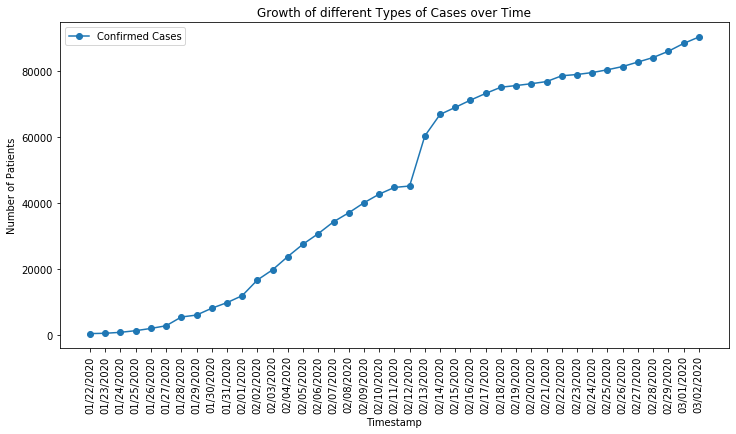

In [42]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

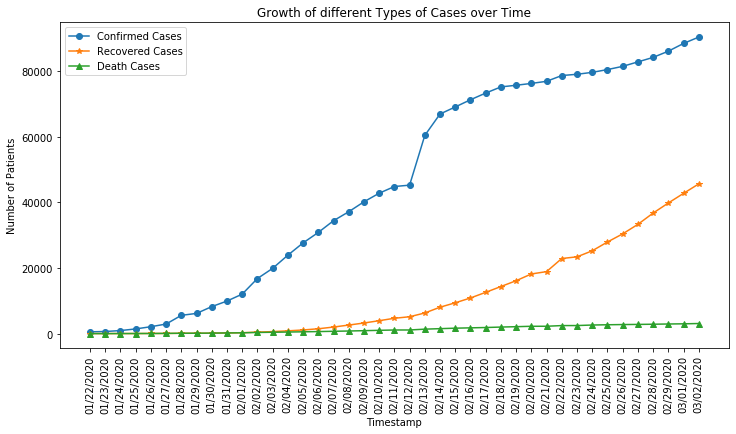

In [37]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


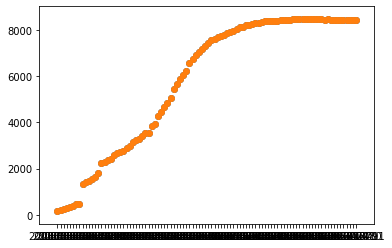

In [28]:
datewises=DataFrame.groupby(["Date"]).agg({"Cumulative number of case(s)":'sum',"Number recovered":'sum',"Number of deaths":'sum'})


train_dfs=pd.DataFrame(zip(list(datewises.index),list(datewises["Cumulative number of case(s)"])),columns=['ds','y'])


ds1 = train_dfs['ds']
y1 = train_dfs['y']
plt.scatter(ds1,y1)
plt.scatter(ds,y)

In [32]:
m = Prophet()
m.fit(train_dfs)
future = m.make_future_dataframe(periods = 30)
forecasts = m.predict(future)
forecasts

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-03-17,-19.177775,-183.606439,79.719657,-19.177775,-19.177775,-33.335144,-33.335144,-33.335144,-33.335144,-33.335144,-33.335144,0.0,0.0,0.0,-52.512919
1,2003-03-18,105.449584,-45.604076,208.124721,105.449584,105.449584,-34.957898,-34.957898,-34.957898,-34.957898,-34.957898,-34.957898,0.0,0.0,0.0,70.491686
2,2003-03-19,230.076943,120.719498,379.996090,230.076943,230.076943,24.832860,24.832860,24.832860,24.832860,24.832860,24.832860,0.0,0.0,0.0,254.909802
3,2003-03-20,354.704301,243.590386,494.517253,354.704301,354.704301,12.505971,12.505971,12.505971,12.505971,12.505971,12.505971,0.0,0.0,0.0,367.210273
4,2003-03-21,479.331660,366.668189,609.334844,479.331660,479.331660,9.548463,9.548463,9.548463,9.548463,9.548463,9.548463,0.0,0.0,0.0,488.880123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2003-08-06,8484.624499,7856.975182,9266.328365,7833.870393,9223.969182,24.832860,24.832860,24.832860,24.832860,24.832860,24.832860,0.0,0.0,0.0,8509.457359
122,2003-08-07,8485.587550,7798.505430,9284.860556,7783.880819,9271.221611,12.505971,12.505971,12.505971,12.505971,12.505971,12.505971,0.0,0.0,0.0,8498.093521
123,2003-08-08,8486.550600,7727.437432,9307.749754,7734.827191,9328.651136,9.548463,9.548463,9.548463,9.548463,9.548463,9.548463,0.0,0.0,0.0,8496.099063
124,2003-08-09,8487.513650,7699.332816,9371.236687,7685.317291,9385.168540,-14.740183,-14.740183,-14.740183,-14.740183,-14.740183,-14.740183,0.0,0.0,0.0,8472.773467


In [60]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods= 100)
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3926.513805,-8776.735566,-1560.326266,-3926.513805,-3926.513805,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,0.0,0.0,0.0,-5240.751889
1,2020-01-23,-2286.869900,-5909.405680,1593.694648,-2286.869900,-2286.869900,127.711498,127.711498,127.711498,127.711498,127.711498,127.711498,0.0,0.0,0.0,-2159.158402
2,2020-01-24,-647.225985,-2602.109308,5380.637084,-647.225985,-647.225985,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,0.0,0.0,0.0,1210.858826
3,2020-01-25,992.417928,-2152.470825,5529.551970,992.417928,992.417928,679.952561,679.952561,679.952561,679.952561,679.952561,679.952561,0.0,0.0,0.0,1672.370488
4,2020-01-26,2632.061862,-897.983583,6661.491336,2632.061862,2632.061862,293.481420,293.481420,293.481420,293.481420,293.481420,293.481420,0.0,0.0,0.0,2925.543282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020-05-26,424148.678437,344649.754454,497229.229187,344829.893403,496956.305189,-1025.301757,-1025.301757,-1025.301757,-1025.301757,-1025.301757,-1025.301757,0.0,0.0,0.0,423123.376679
126,2020-05-27,427721.061535,346280.299306,500093.011880,347193.985809,501440.092661,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,0.0,0.0,0.0,426406.823451
127,2020-05-28,431293.444633,350946.089721,506334.850899,349792.047425,505978.899385,127.711498,127.711498,127.711498,127.711498,127.711498,127.711498,0.0,0.0,0.0,431421.156130
128,2020-05-29,434865.827731,354501.570274,513245.371467,352169.498667,510513.430290,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,0.0,0.0,0.0,436723.912542


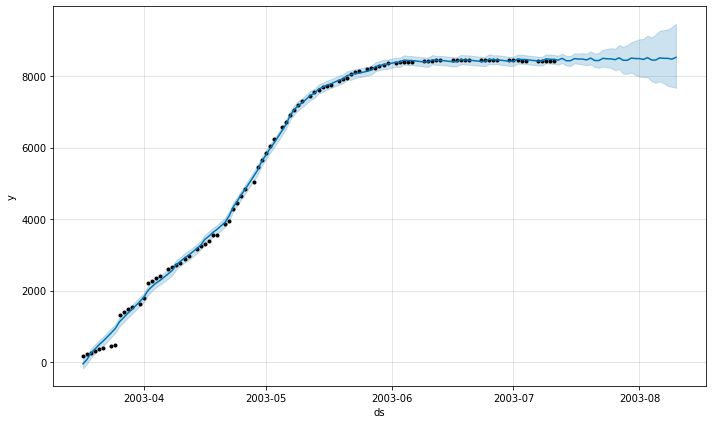

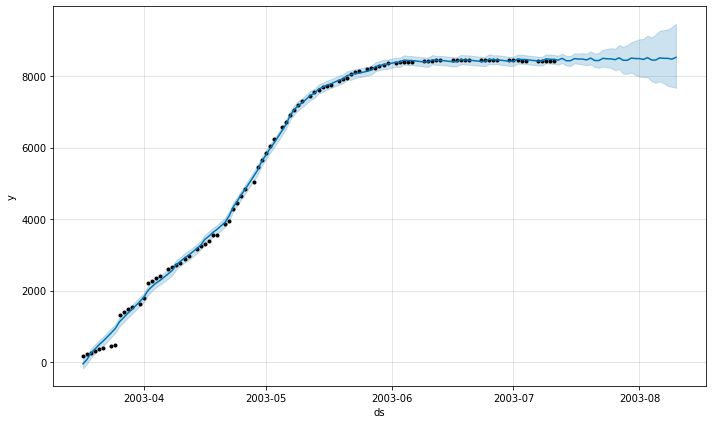

In [35]:
#m.plot(forecast)
m.plot(forecasts)

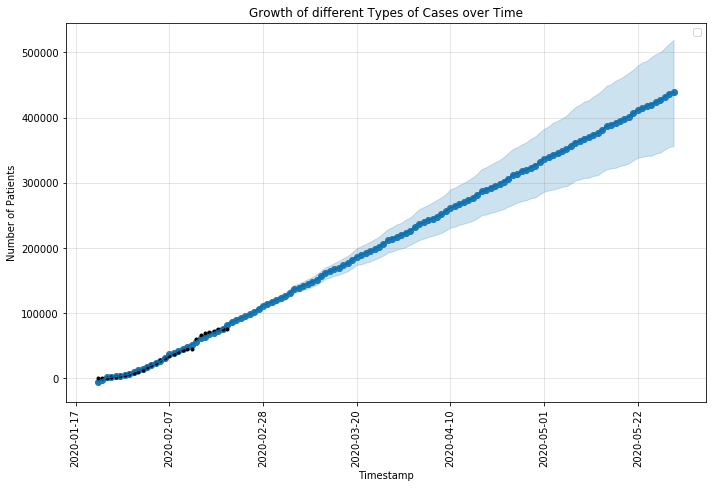

In [61]:
#plt.figure(figsize=(12,6))

m.plot(forecast)
# plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
# plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
# plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.scatter(forecast['ds'], forecast['yhat'],)
#plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

In [102]:
covid = pd.read_csv("/home/sonam/Downloads/covid_19_data.csv")
covid_india = pd.read_csv('covid_india.csv')

In [113]:
datewise_Indi = covid_india.groupby(["Date"]).agg({"ConfirmedIndianNational":'sum'})
datewise_India = datewise_Indi.cumsum(axis=0)

In [109]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)


In [110]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
#India_data=covid[covid["Country/Region"]=="India"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")]

In [111]:
datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
#datewise_India=India_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

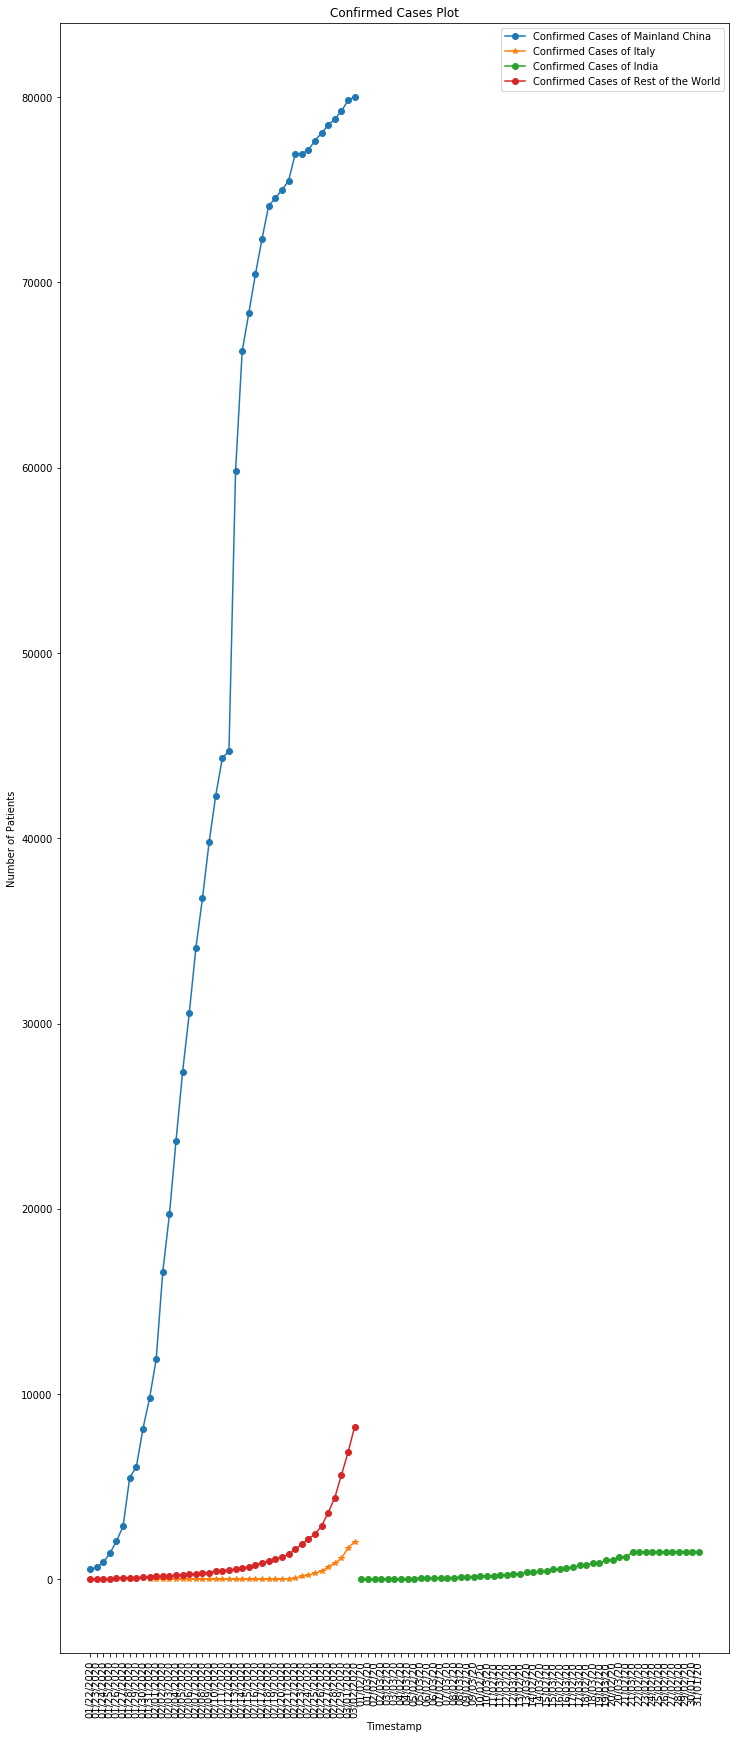

In [114]:
fig, (ax1) = plt.subplots(1, 1,figsize=(12,30))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",marker='o')
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",marker='*')
ax1.plot(datewise_India["ConfirmedIndianNational"],label="Confirmed Cases of India",marker='o')
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",marker='o')
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

    
# ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",marker='o')
# ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",marker='*')
# ax2.plot(datewise_India["Recovered"],label="Recovered Cases of India",marker='*')
# ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",marker='^')
# ax2.set_title("Recovered Cases Plot")
# ax2.set_ylabel("Number of Patients")
# ax2.set_xlabel("Timestamp")
# ax2.legend()
# for tick in ax2.get_xticklabels():
#     tick.set_rotation(90)

In [117]:
Itlay =pd.DataFrame(zip(list(datewise_Italy.index),list(datewise_Italy["Confirmed"])),columns=['ds','y'])
India =pd.DataFrame(zip(list(datewise_India.index),list(datewise_India["ConfirmedIndianNational"])),columns=['ds','y'])

In [128]:
m = Prophet()
m.fit(Itlay)
future = m.make_future_dataframe(periods= 30)
forecast_Italy = m.predict(future)
forecast_Italy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,-335.529845,-790.804086,104.246781,-335.529845,-335.529845,7.644173,7.644173,7.644173,7.644173,7.644173,7.644173,0.0,0.0,0.0,-327.885673
1,2020-02-01,-299.013423,-689.233967,166.403158,-299.013423,-299.013423,27.530395,27.530395,27.530395,27.530395,27.530395,27.530395,0.0,0.0,0.0,-271.483028
2,2020-02-02,-262.497001,-559.193583,320.193589,-262.497001,-262.497001,122.810194,122.810194,122.810194,122.810194,122.810194,122.810194,0.0,0.0,0.0,-139.686808
3,2020-02-03,-225.980579,-533.762204,397.281565,-225.980579,-225.980579,169.494136,169.494136,169.494136,169.494136,169.494136,169.494136,0.0,0.0,0.0,-56.486444
4,2020-02-04,-189.464157,-755.272276,169.682455,-189.464157,-189.464157,-111.313506,-111.313506,-111.313506,-111.313506,-111.313506,-111.313506,0.0,0.0,0.0,-300.777663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-03-28,1745.914885,1309.139122,2216.684880,1745.913800,1745.915984,27.530395,27.530395,27.530395,27.530395,27.530395,27.530395,0.0,0.0,0.0,1773.445280
58,2020-03-29,1782.431508,1486.840291,2347.893818,1782.430362,1782.432675,122.810194,122.810194,122.810194,122.810194,122.810194,122.810194,0.0,0.0,0.0,1905.241702
59,2020-03-30,1818.948131,1536.526306,2435.398050,1818.946912,1818.949359,169.494136,169.494136,169.494136,169.494136,169.494136,169.494136,0.0,0.0,0.0,1988.442267
60,2020-03-31,1855.464754,1288.976023,2167.834668,1855.463468,1855.466052,-111.313506,-111.313506,-111.313506,-111.313506,-111.313506,-111.313506,0.0,0.0,0.0,1744.151248


In [129]:
m = Prophet()
m.fit(India)
future = m.make_future_dataframe(periods= 30)
forecast_India = m.predict(future)
forecast_India

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,885.036076,268.790231,1520.445379,885.036076,885.036076,9.083368,9.083368,9.083368,9.083368,9.083368,9.083368,0.0,0.0,0.0,894.119444
1,2020-01-03,882.300862,265.672039,1474.316900,882.300862,882.300862,2.930121,2.930121,2.930121,2.930121,2.930121,2.930121,0.0,0.0,0.0,885.230983
2,2020-01-30,808.450086,171.407674,1421.819547,808.450086,808.450086,9.083368,9.083368,9.083368,9.083368,9.083368,9.083368,0.0,0.0,0.0,817.533454
3,2020-01-31,805.714872,177.745638,1451.718377,805.714872,805.714872,2.930121,2.930121,2.930121,2.930121,2.930121,2.930121,0.0,0.0,0.0,808.644993
4,2020-02-02,800.244444,9.667850,1242.281717,800.244444,800.244444,-189.060498,-189.060498,-189.060498,-189.060498,-189.060498,-189.060498,0.0,0.0,0.0,611.183946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2020-12-29,-105.111364,-734.088501,506.072986,-105.111366,-105.111363,-16.243569,-16.243569,-16.243569,-16.243569,-16.243569,-16.243569,0.0,0.0,0.0,-121.354933
78,2020-12-30,-107.846578,-558.047335,677.923557,-107.846580,-107.846577,145.386184,145.386184,145.386184,145.386184,145.386184,145.386184,0.0,0.0,0.0,37.539606
79,2020-12-31,-110.581792,-793.237220,538.044516,-110.581794,-110.581791,9.083368,9.083368,9.083368,9.083368,9.083368,9.083368,0.0,0.0,0.0,-101.498424
80,2021-01-01,-113.317006,-768.306329,541.012865,-113.317008,-113.317004,2.930121,2.930121,2.930121,2.930121,2.930121,2.930121,0.0,0.0,0.0,-110.386886


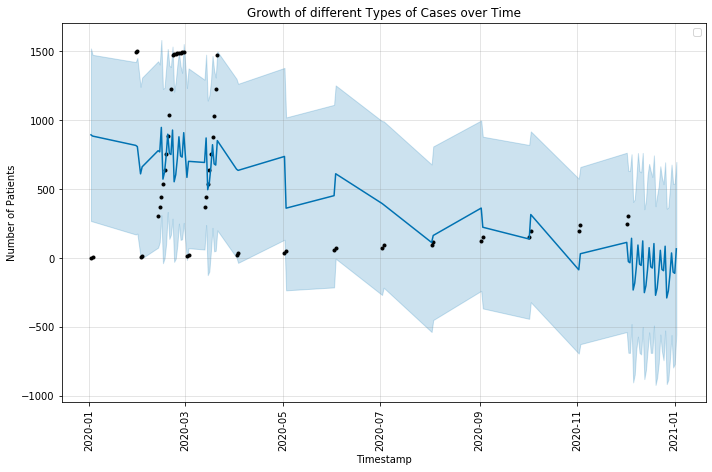

In [139]:
m.plot(forecast_India)


#plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

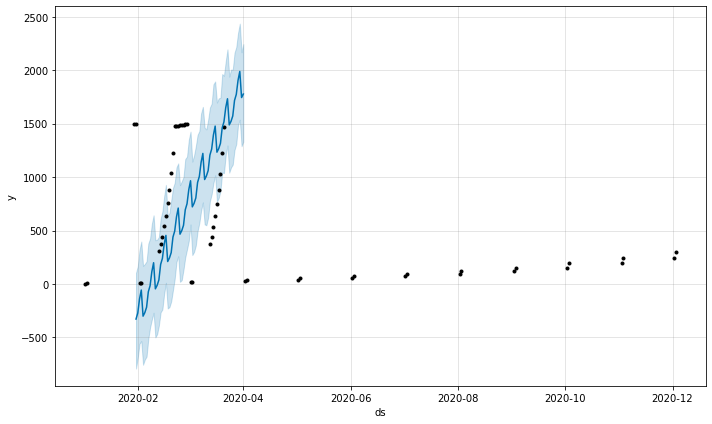

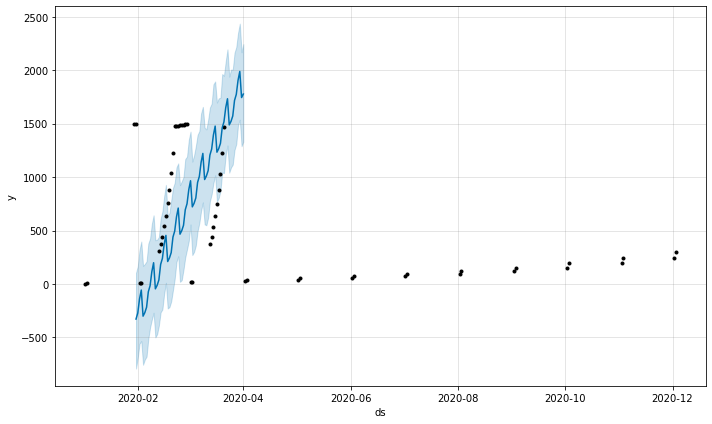

In [131]:
m.plot(forecast_Italy)
